**Name:** Messum Hassan
**RollNo:** AI-043

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

In [87]:
data=pd.read_csv('/content/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


#Using (Hours Studied,Previous Scores) as a subset for predicting performance index

In [88]:
df_1=data[['Hours Studied','Previous Scores','Performance Index']]

In [89]:
X=df_1[['Hours Studied','Previous Scores']]
y=df_1['Performance Index']
X.shape
y.shape

(10000,)

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [91]:
multi_regressor=LinearRegression()
multi_regressor.fit(X_train,y_train)
y_pred=multi_regressor.predict(X_test)

In [92]:
print(f"RMSE:{mean_squared_error(y_test,y_pred)**(1/2)}")

RMSE:2.2806459919574738


#Using different subsets,splits and random state

In [93]:
X=data[['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y=data['Performance Index']

X['Extracurricular Activities']=LabelEncoder().fit_transform(X['Extracurricular Activities'])


<ipython-input-93-422d1a981263>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Extracurricular Activities']=LabelEncoder().fit_transform(X['Extracurricular Activities'])


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=30)

In [95]:
multi_regressor=LinearRegression()
multi_regressor.fit(X_train,y_train)
y_pred=multi_regressor.predict(X_test)

In [96]:
print(f"RMSE:{mean_squared_error(y_test,y_pred)**(1/2)}")

RMSE:18.899762986573233


# OBSERVATION: first subset of features tend to produce better RMSE

**Polynomial Regression**

In [97]:
data=pd.read_csv('/content/50_Startups.csv')

In [98]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


R&D Spend

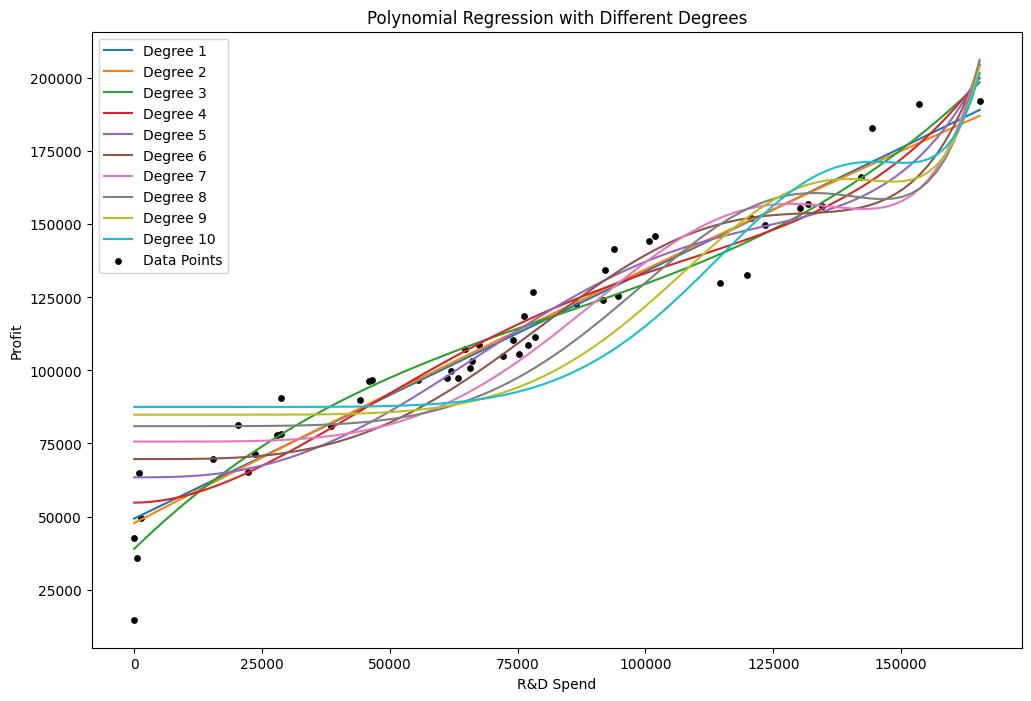

,Degree,MSE,R2 Score
0,1,6.031684e+07,0.957131
1,2,6.134904e+07,0.956397
2,3,9.910256e+07,0.929565
3,4,8.352759e+07,0.940634
4,5,1.129085e+08,0.919752
5,6,1.657350e+08,0.882207
6,7,2.273071e+08,0.838446
7,8,2.976838e+08,0.788427
8,9,3.799337e+08,0.729969
9,10,4.619441e+08,0.671682


In [99]:


X = data['R&D Spend'].values.reshape(-1, 1)
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    mse_values = []
    r2_values = []

    plt.figure(figsize=(12, 8))

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)


        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_values.append(mse)
        r2_values.append(r2)


        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_range_pred = model.predict(poly.transform(X_range))
        plt.plot(X_range, y_range_pred, label=f"Degree {degree}")

    plt.scatter(X, y, color='black', s=15, label="Data Points")
    plt.title("Polynomial Regression with Different Degrees")
    plt.xlabel("R&D Spend")
    plt.ylabel("Profit")
    plt.legend()
    plt.show()

    return mse_values, r2_values


mse_values, r2_values = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

performance_metrics = pd.DataFrame({
    'Degree': degrees,
    'MSE': mse_values,
    'R2 Score': r2_values
})

performance_metrics

Administration

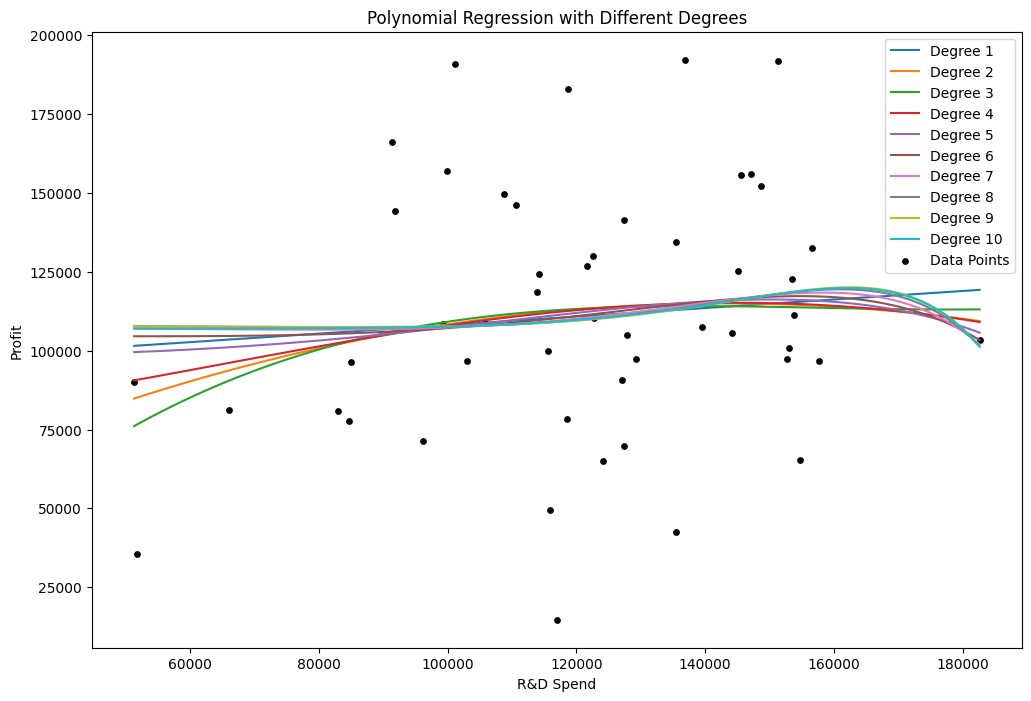

,Degree,MSE,R2 Score
0,1,1.289450e+09,0.083547
1,2,1.145317e+09,0.185987
2,3,1.104810e+09,0.214777
3,4,1.184170e+09,0.158373
4,5,1.260706e+09,0.103976
5,6,1.312954e+09,0.066842
6,7,1.340819e+09,0.047038
7,8,1.350855e+09,0.039904
8,9,1.349570e+09,0.040818
9,10,1.341775e+09,0.046358


In [100]:



X = data['Administration'].values.reshape(-1, 1)
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    mse_values = []
    r2_values = []

    plt.figure(figsize=(12, 8))

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)


        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_values.append(mse)
        r2_values.append(r2)


        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_range_pred = model.predict(poly.transform(X_range))
        plt.plot(X_range, y_range_pred, label=f"Degree {degree}")

    plt.scatter(X, y, color='black', s=15, label="Data Points")
    plt.title("Polynomial Regression with Different Degrees")
    plt.xlabel("R&D Spend")
    plt.ylabel("Profit")
    plt.legend()
    plt.show()

    return mse_values, r2_values


degrees = [1, 2, 3, 4,5,6,7,8,9,10]
mse_values, r2_values = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

performance_metrics = pd.DataFrame({
    'Degree': degrees,
    'MSE': mse_values,
    'R2 Score': r2_values
})

performance_metrics

Marketing Spend

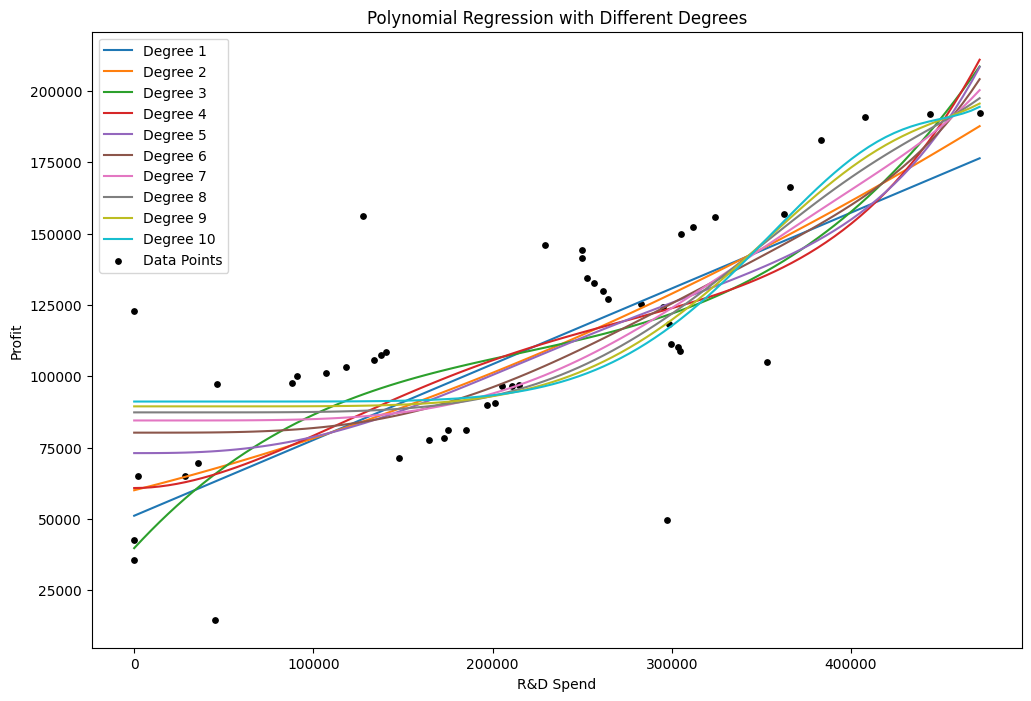

,Degree,MSE,R2 Score
0,1,7.276321e+08,0.482849
1,2,6.419491e+08,0.543747
2,3,8.967149e+08,0.362676
3,4,7.345465e+08,0.477935
4,5,6.469708e+08,0.540177
5,6,6.054846e+08,0.569663
6,7,5.980640e+08,0.574937
7,8,6.078633e+08,0.567972
8,9,6.250798e+08,0.555736
9,10,6.452313e+08,0.541414


In [101]:

X = data['Marketing Spend'].values.reshape(-1, 1)
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def polynomial_regression(X_train, y_train, X_test, y_test, degrees):
    mse_values = []
    r2_values = []

    plt.figure(figsize=(12, 8))

    for degree in degrees:
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_pred = model.predict(X_test_poly)


        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mse_values.append(mse)
        r2_values.append(r2)


        X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_range_pred = model.predict(poly.transform(X_range))
        plt.plot(X_range, y_range_pred, label=f"Degree {degree}")

    plt.scatter(X, y, color='black', s=15, label="Data Points")
    plt.title("Polynomial Regression with Different Degrees")
    plt.xlabel("R&D Spend")
    plt.ylabel("Profit")
    plt.legend()
    plt.show()

    return mse_values, r2_values

degrees = [1, 2, 3, 4,5,6,7,8,9,10]
mse_values, r2_values = polynomial_regression(X_train, y_train, X_test, y_test, degrees)

performance_metrics = pd.DataFrame({
    'Degree': degrees,
    'MSE': mse_values,
    'R2 Score': r2_values
})

performance_metrics

#Polynomial Regression on data set of choice

In [102]:
data=pd.read_csv('/content/Ice_cream selling data.csv')

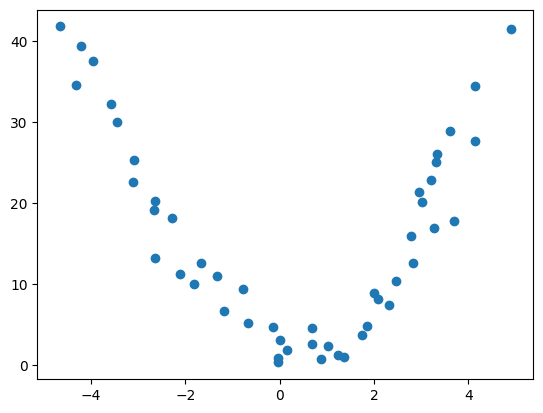

In [103]:
plt.scatter(data['Temperature (°C)'],data['Ice Cream Sales (units)'])

This shows a very non-linear relationship

In [104]:
X,y=data['Temperature (°C)'],data['Ice Cream Sales (units)']

In [105]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
poly=PolynomialFeatures(degree=2)

In [107]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [108]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [109]:
y_pred=model.predict(X_test)

In [110]:
mse=mean_squared_error(y_test,y_pred)

In [111]:
print(f"RMSE:{mse**(1/2)}")

RMSE:12.219913714640208


Trying different random sate and test size

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)
poly=PolynomialFeatures(degree=2)

In [113]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [114]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred=model.predict(X_test)

In [116]:
mse=mean_squared_error(y_test,y_pred)

In [117]:
print(f"RMSE:{mse**(1/2)}")

RMSE:14.522186795091262
